# Classification Practices

Bu notebook, sınıflama modelleri için bir el kitabı olması amacıyla hazırlanmıştır. Teorik bilgi konusunda derinlemesine bir kavrayışta bulunulmamış, yalnızca uygulamalara ilişkin kısa bilgiler verilmiştir. Bu sebeple bu notebook'u kendi uygulamalarınız esnasında yönlendirici ve başvurulacak bir kaynak olarak görmeniz, her konsept için teorik altyapıyı oluşturduktan sonra uygulamaya geçmeniz tavsiye edilir.

Notebook içerisinde basit ve kompleks veri setleri kullanılmış olup, gerekli olduğu yerlerde pre-processing işlemlerine başvurulmuştur.

Hazırlayan: Mert Yasin Bozkır

- https://bento.me/mybozkir

## Kütüphaneler

In [1]:
# Import Libraries

#Regular Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

#Regression Metrics
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Classification Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score

#Regression Models
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# import lightgbm as lgb
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Preprocessing & Feature Engineering
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures

#Pipe & Hyperparameter Tuning
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Tree
from sklearn import tree

#Warnings
from warnings import filterwarnings
filterwarnings('ignore', category = DeprecationWarning)
filterwarnings('ignore', category = FutureWarning)

%matplotlib inline

## KNeighbors Classifier

İlk göreceğimiz sınıflama modeli K-Neighbors Classifier olacak.

Bu sınıflama modeli için bir K parametresi belirliyoruz, örneğin 5 olsun. Model, her gözlem için, gözleme en çok benzeyen 5 gözleme bakarak bu gözlemlerde en çok tekrar eden sınıfı bulur ve ilgili gözleme o sınıfı tahmin olarak atar.

In [2]:
df_ = pd.read_csv('../../datasets/classification/weight-height.csv')

df = df_.copy()

In [3]:
df

,Gender,Weight,Height
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


Sınıflama modellerine girişte, ilk kullanacağımız veri seti ağırlık ve uzunluk bilgilerine istinaden cinsiyetleri sınıflayacağımız bir veri seti olacak. Görebileceğimiz üzere 10000 adet gözlemden oluşuyor.

İlk olarak basitçe bu gözlemlerin dağılımlarına bakalım.

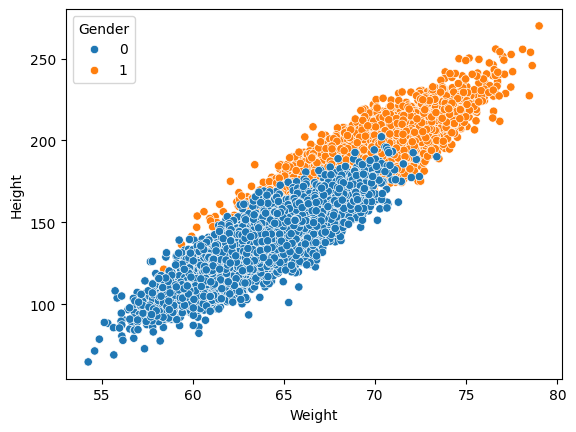

In [4]:
sns.scatterplot(data = df, x = 'Weight', y = 'Height', hue = 'Gender') ;

In [5]:
# X ve y olmak üzere model için gerekli setleri oluşturalım.

X = df.drop(columns = ['Gender'], axis = 1)

y = df['Gender']

In [6]:
# Train/Test ayrımını gerçekleştirelim.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Burada regresyon modelleri için yaptığımız ayrımdan farklı olarak stratify parametresine y değerini veriyoruz.
# Bu parametre, train ve test setlerindeki sınıf dağılımlarının tabakalı, yani homojen bir şekilde yapılmasını sağlar.
# Bu sayede öğrenme ve test süreci daha etkin gerçekleşir.

In [7]:
# KNN instance'ını oluşturalım ve modelimizi kuralım. Örneğin komşu değerini 5 verelim.
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Örneğin elimizde 85kg ve 185cm boyunda bir kişi olsun. Ek olarak 56kg ve 164cm boyunda bir kişi daha olsun.
# Bakalım modelimiz bu kişilerin cinsiyetlerini ne olarak tahmin edecek.

knn.predict([[85, 185], [56, 164]])

c:\Users\myboz\development\mybozkir\mybozkirenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1], dtype=int64)

Modelimiz ikisini de erkek olarak tahminledi. Şimdi test seti ile tahmin işlemi gerçekleştirerek genel performansa bakalım.

In [9]:
y_pred = knn.predict(X_test)

In [10]:
# Şimdi Accuracy score'u görelim. Accuracy score, modelin toplamda % kaç isabetle tahmin yapabildiğini gösterir.
# Basitçe score methoduyla bunu görebiliriz. Bu methoda test setlerini verirsek kendisi fit işlemini yapıp skorlama yapar.

knn.score(X_test, y_test)

0.908

Modelimiz %90.8 isabetle doğru tahmin yapıyor. Yani her 1000 gözlemin 908 adedini doğru tahminlemiş.

Ancak bu genel skor bizim için her zaman istediğimiz bilgiyi vermeyebilir. Bunun ne demek olduğunu ilerleyen kısımda göreceğiz.

## Naive Bayes Classifier

Naive Bayes Classifier, en basit anlatımıyla bir gözlemin hangi sınıfa ait olabileceğine ilişkin olasılıkları Bayes teoremine uygulayarak çalışır. Buradaki Naive ifadesi, tahminleme için kullanılan her değişkenin birbirinden bağımsız (yani aralarında bir korelasyon olmadığını) olduğunu varsayıldığını gösterir.

In [11]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.891

## KNN & Naive Bayes | Diabetes Veri Seti

Bu bölümde Diabetes veri setini kullanarak her iki modelin performanslarını göreceğiz.

In [12]:
# Okuduğumuz dosyanın uzantısı bu sefer .csv değil, .txt. Bu sebeple read_table methodunu kullanıyoruz.
df_ = pd.read_table('../../datasets/classification/diabetesdata.txt')

df = df_.copy()

In [13]:
df

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
# X ve y setlerini ayıralım.

X = df.drop(columns = ['Diabetes'], axis = 1)

y = df['Diabetes']

In [15]:
# Train/Test Split yapalım.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [16]:
# KNN modelimizi kuralım ve fit edelim.
knn = KNeighborsClassifier(n_neighbors = 5) 

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6688311688311688

In [17]:
# Peki ya 10 adet yakın komşuyla bir model kursaydık nasıl olacaktı?
knn = KNeighborsClassifier(n_neighbors = 10) 

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6818181818181818

In [18]:
# Şimdi 1'den 10'a kadar farklı komşu değerleriyle skorlama yapıp bu skorları karşılaştıralım.

neighbors = np.arange(3, 11).tolist() # Bu kısımda 3'ten 10'a kadar (10 dahil) bir range oluşturup liste formatında tutuyoruz.

scores = pd.DataFrame([], columns = ['Score']) # Elde ettiğimiz skorları bu DataFrame içerisinde tutacağız.

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)

    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)

    scores.loc[n] = score

scores = scores.sort_values(by = 'Score', ascending = False)
scores

,Score
4,0.727273
6,0.714286
8,0.707792
3,0.694805
9,0.688312
10,0.681818
7,0.675325
5,0.668831


Görebileceğimiz üzere en iyi komşu değerimiz 4 geldi.

Şimdi Naive Bayes ile skorlama yapalım.

In [19]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nb.score(X_test, y_test)

0.7077922077922078

## Logistic Regression

Logistic Regression, e / (1 + e) şeklindeki lojistik fonksiyonda, e değerlerinin üslerine regresyon model kurarak sınıf çıktılarını 0 ve 1 arasında bir olasılık grafiğinde değerlendirerek tahmin işlemi yapar.

Lojistik fonksiyon ile regresyon denklemini birleştirdiğimiz için, yine değişkenlerin katsayılarını bulması gerekir. Her X değeri için bu kombinasyonla bir sınıf olasılığı türetir.

Örneğin 1 ve 0 sınıflarımız olduğunu varsayalım. Eğer varsayımsal olarak bizim için bir sınıfın 1 olması için gerekli olasılık eşiği %50'nin üstündeyse, bu değerin üstündeki her olasılık için 1 ataması yapılır. Bazı durumlarda bu eşiği yükseltmek veya azaltmak isteyebiliriz, bu durum mümkündür.

In [20]:
# max_iter parametresi maksimum iterasyon sayısını ifade eder. Bir kısıt oluşturmamak için yükselttik.
# Penalty parametresi ise L1, L2 veya bunların kombinasyonlarından oluşan elastic net ceza parametresidir. Henüz bunu görmedik, o yüzden detaya girmiyorum.

logreg = LogisticRegression(max_iter = 10000, penalty = None)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [21]:
# Herhangi bir modele ait bilgilere erişmek için aşağıdaki kodu kullanabilirsiniz. (Model isminin başına ? koymalısınız.)

# ?LogisticRegression

In [22]:
X.columns

Index(['Preg', 'Glucose', 'BP', 'SkinThick', 'Insul', 'BMI', 'DPF', 'Age'], dtype='object')

In [23]:
# Kurduğumuz modelde oluşturulan katsayılara bakalım. Bu katsayılar yukarıda bahsettiğimiz üzere Regresyon katsayılarıdır.

logreg.coef_

array([[ 0.11492053,  0.0369776 , -0.01113966,  0.0043881 , -0.00127346,
         0.09259596,  0.78571926,  0.01537891]])

In [24]:
#logreg.coef_ 2D bir çıktı döndüğü için shape'i düzeltmek adına .flatten() kullanıyoruz.

logreg_coeff = pd.DataFrame(logreg.coef_.flatten(), X.columns, columns = ['Coefficients'])

logreg_coeff

,Coefficients
Preg,0.114921
Glucose,0.036978
BP,-0.011140
SkinThick,0.004388
Insul,-0.001273
BMI,0.092596
DPF,0.785719
Age,0.015379


In [25]:
# Normalde skorlama işlemini aşağıdaki gibi yapıyorduk.
logreg.score(X_test, y_test)

0.7142857142857143

In [26]:
# Ancak bu skorlamayı (Accuracy) accuracy_score kullanarak da yapabiliriz. Farklı olarak buraya y_test ve y_pred değerlerini vermeniz gerekir.
y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)

0.7142857142857143

Şimdi sınıflama modelleri için önemli metriklerden birisi olan Confusion Matrix'i nasıl oluşturacağımızı görelim.

Bu matris, en basit anlatımıyla normalde 1 olması gereken sınıfların kaçını 1, kaçını 0 olarak; normalde 0 olması gereken sınıfların kaçını 1, kaçını 0 olarak sınıflamış bunu gösterir. Sınıf sayısı artarsa, matris buna göre genişler.


In [27]:
# Confusion Matrix doğru değerler ve tahmin değeler arasında mukayese yaptığı için y_test ve y_pred değerlerini veriyoruz.
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[82, 18],
       [26, 28]], dtype=int64)

Confusion Matrix görebileceğiniz üzere array olarak çıktı üretir. Bunu görselleştirirsek daha güzel bir görüntü elde ederiz.

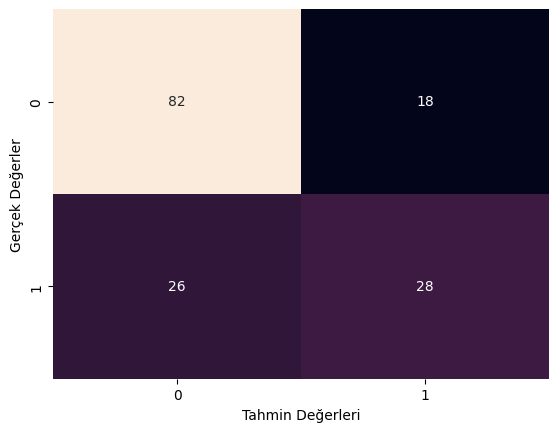

In [28]:
sns.heatmap(conf_matrix, annot = True, cbar = False)

plt.xlabel('Tahmin Değerleri')
plt.ylabel('Gerçek Değerler')

plt.show()

Şimdi Accuracy ile beraber diğer metriklere de göz atalım. Bunlar Recall ve Precision'dır. Bu metrikleri sınıflama modellerinde sıklıkla kullanırız.

- **Accuracy**: Modelin doğru tahmin ettiği örneklerin toplam tahmine oranıdır. -> (TP + TN) / (TP + TN + FP + FN)
  - Eğer veri setindeki sınıf değerleri dengesizse (örneğin 800 adet 1, 200 adet 0 sınıfı var) yanıltıcı olabilir. Çünkü toplamda ne kadar doğru olduğunun bilgisini verirken, 1 ve 0 için ayrı ayrı kaç adet doğru tahmin yaptığını söylemez. Bu yüzden Confusion Matrix ve başka metrikler ile modeli değerlendirmek gerekir.
- **Recall**: Modelin, gerçek pozitifleri doğru tahmin etme oranıdır: ->  TP / (TP + FN)
- **Precision**: Modelin pozitif olarak tahmin ettiği değerlerin, gerçekten pozitif olma oranıdır. Yanlış pozitif tahminleri minimize eder.
  - Eğer yanlışlıkları minimize etmek istersek bu önemlidir. Örneğin spam filtrelemek için bir model geliştiriyorsak bu metrik önemli olacaktır.
  
**Kısaltmalar**
- TP: True Positive (Gerçek Pozitif)
- TN: True Negative (Gerçek Negatif)
- FP: False Positive (Yanlış Pozitif)
- FN: False Negative (Yanlış Negatif)

In [29]:
# Bu metrikleri aşağıdaki şekilde oluşturabiliriz.

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185


İstersek modelimizin her bir test gözlemi için ürettiği sınıf olasılıklarını görebiliriz.

In [30]:
logreg.predict_proba(X_test)[:5]

array([[0.37813832, 0.62186168],
       [0.89104627, 0.10895373],
       [0.7300634 , 0.2699366 ],
       [0.71395335, 0.28604665],
       [0.99581523, 0.00418477]])

Yukarıdaki örnekte, modelimizin ilk X_test gözlemi için %37 olasılıkla 0 sınıfı, %62 olarak 1 sınıfı olasılığı ürettiğini görebiliriz.

Modelimiz default olarak eşik değerini %50 aldığı için, ilk gözlemin değeri 0 olacaktır.

Kalan gözlemlerin sınıf değerleri de sırasıyla [0, 0, 0, 0] şeklinde olacaktır. y_pred çıktımıza bakarak bunu gözlemleyebiliriz.

In [31]:
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

Peki threshold, yani eşik değerini nasıl değiştirebiliriz?

In [32]:
# Öncelikle tüm test değerlerinin 1 olma olasılıklarını bir değişkende tutalım. Bunun için predict_proba'nın 1. index'teki kolonunu almamız gerek.

y_pred_proba = logreg.predict_proba(X_test)[::, 1] # :: ile tüm satırları alırken, 1 ile sadece ikinci sütun (yani 1 numaralı index)'i alıyoruz.
y_pred_proba[:10]

array([0.62186168, 0.10895373, 0.2699366 , 0.28604665, 0.00418477,
       0.18668687, 0.46965923, 0.92104622, 0.10165382, 0.78593106])

In [33]:
# Şimdi yeni bir eşik değeri belirleyelim. Örneğin %65 olsun.
threshold = 0.65

# Bu durumda, 0.65 olasılık değerinin üstündeki değerler 1 sınıfına ait olacak, kalan değerler için 0 sınıfı oluşturmuş olacağız.
y_pred = (y_pred_proba > threshold).astype('float64')
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.])

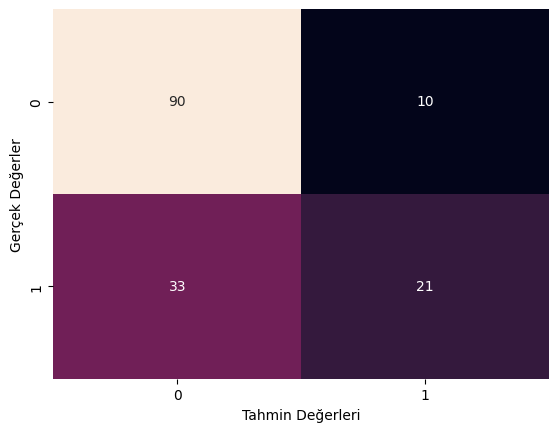

In [34]:
# Şimdi yeni y_pred ve y_test değerlerimiz ile confusion matrix çizdirelim.

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cbar = False)

plt.xlabel('Tahmin Değerleri')
plt.ylabel('Gerçek Değerler')

plt.show()

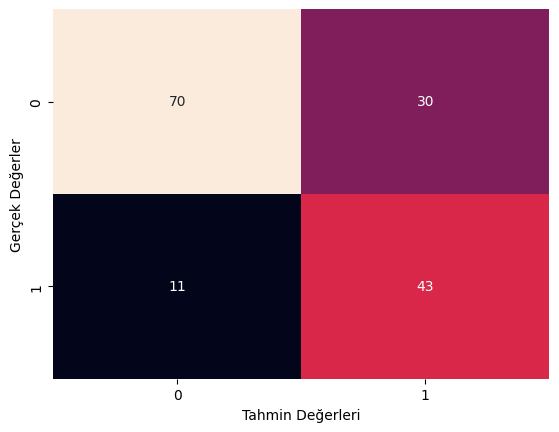

In [35]:
# Eşik değerini bu sefer %30 yapıp tekrar gözlemleyelim.
threshold = 0.30

y_pred = (y_pred_proba > threshold).astype('float64')
y_pred[:10]

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cbar = False)

plt.xlabel('Tahmin Değerleri')
plt.ylabel('Gerçek Değerler')

plt.show()

Sınıflama için kullandığımız bir başka performans metriği ise ROC, yani Receiver Operating Characteristic'tir.

Bu metrik modelimizin sınıflandırma yeteneğini ölçer ve True Positive Rate (Recall) ile False Positive Rate ilişkisini gösterir.

Bu skorlamayı AUC grafiği, yani Area Under Curve grafiği ile gösteriyoruz. bu grafik bize bir eğri veriyor, eğrinin altındaki alan maksimize olursa 1, minimize olursa 0 değerini alıyor. Bu alan 1'e ne kadar yakınsa modelin ayrım gücü o kadar iyi demektir.

Yani yüksek bir AUC değeri, modelimizin pozitif ve negatif sınıfları çok iyi bir şekilde ayırt ettiğni gösterir.

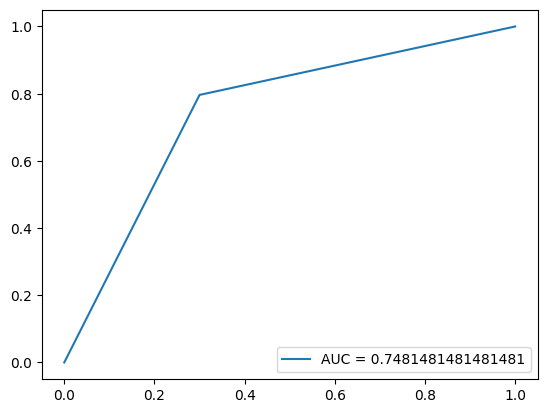

In [36]:
# roc_curve returnleri ile aynı isimlendirmeyle değişkenlerimi oluşturuyorum. Ek bilgi için method docstring'ine bakınız.
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = 'AUC = ' + str(auc))
plt.legend(loc = 4)
plt.show()

Yukarıdaki grafik, %50 default threshold değeri ile olanları gösteriyor.

Şimdi bir de %65 ile olanlara bakalım.

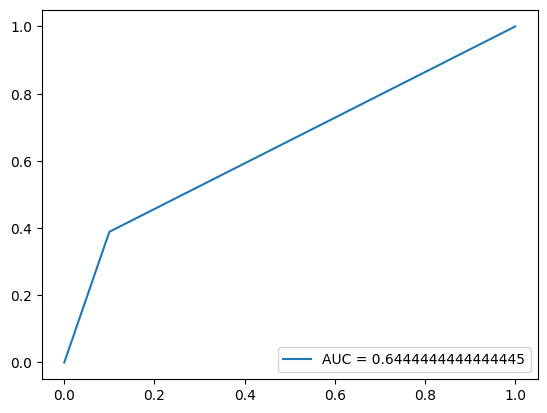

In [37]:
# Eşik değerini bu sefer %65 yapıp tekrar gözlemleyelim.
threshold = 0.65

y_pred = (y_pred_proba > threshold).astype('float64')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = 'AUC = ' + str(auc))
plt.legend(loc = 4)
plt.show()

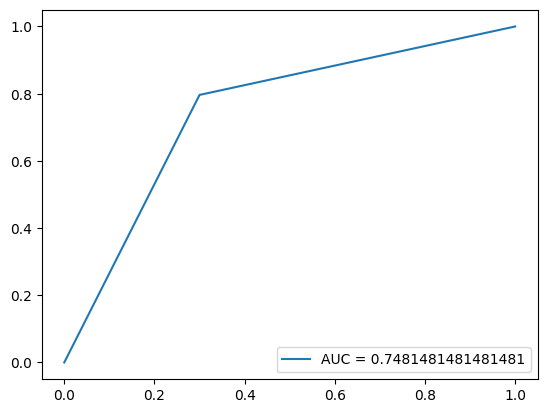

In [38]:
# Eşik değerini bu sefer %30 yapıp tekrar gözlemleyelim.
threshold = 0.30

y_pred = (y_pred_proba > threshold).astype('float64')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label = 'AUC = ' + str(auc))
plt.legend(loc = 4)
plt.show()

Şu ana kadar iki sınıf değerine sahip veri setlerini gördük. Şimdi en bilindik veri setlerinden birisi olan iris veri seti ile ikiden fazla sınıf değerine ilişkin gözlemler yapalım.

In [39]:
iris = pd.read_csv('../../datasets/classification/iris.csv')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Görebileceğimiz üzere Setosa, Versicolor ve Virginica olmak üzere 3 adet sınıfımız var. Meraklısı için bunlar, bir çiçek türüne ait varyantlar.

In [41]:
# Sadece sepal özellikleri üzerine bir model kuralım.

X = iris[['sepal.length', 'sepal.width']]

iris.variety = iris.variety.astype('category')

Normalde veri tipi Object olan variety değişkenini category veri tipine çevirdik.

Hatırlarsanız regresyon çalışmalarında encoding işlemi yaparak text verileri numerik hale çevirmiştik. Burada da aynı mantık geçerli. Modelimizden text değerleri sınıf olarak tanımasını istersek hata verir. Bunun için Label Encoding işlemi yaparak her sınıf değeri için bir numara ataması yapabilirdik.

Encoding yerine veri tipini category'ye çevirerek de bu işlemi yapabiliriz zira category veri tipine sahip bir değişkendeki her unique değer arka planda bir kategori numarasına sahip oluyor. Biz bu kategori numaralarını çıkartarak atamaları gerçekleştirebiliriz. Her numara ilgili sınıf değerini temsil edecektir.

In [42]:
y = iris.variety.cat.codes.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [43]:
# train/test split işlemini gerçekleştirelim.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [44]:
# Logistic Regression modeli kuralım.

logreg = LogisticRegression(max_iter = 10000, penalty = None)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [45]:
# Tahmin işlemini gerçekleştirelim.

y_pred = logreg.predict(X_test)

# Accuracy Score'a bakalım.

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7333333333333333


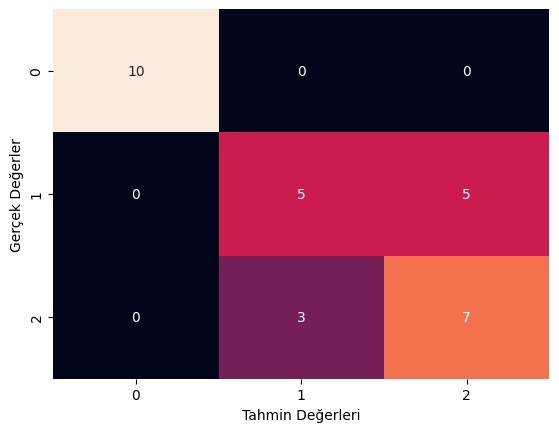

In [46]:
# Confusion Matrix'e bakalım.

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cbar = False)

plt.xlabel('Tahmin Değerleri')
plt.ylabel('Gerçek Değerler')

plt.show()

In [47]:
# Bakalım 5 komşulu bir KNN nasıl performans gösteriyor.

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7666666666666667


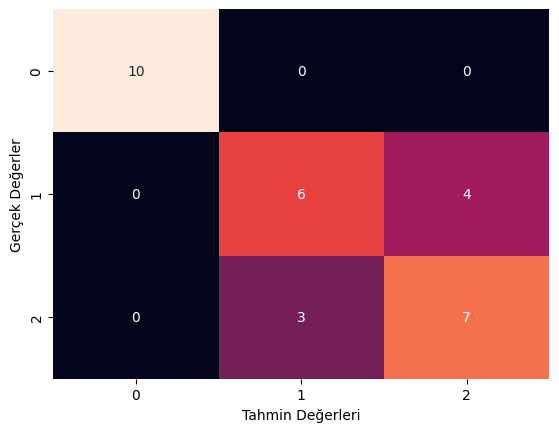

In [48]:
# Confusion Matrix'e bakalım.

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cbar = False)

plt.xlabel('Tahmin Değerleri')
plt.ylabel('Gerçek Değerler')

plt.show()

Şimdi Logistic Regression modeliyle StratifiedKFold ve Pipe kullanarak optimum değeri bulmaya çalışalım.

Normalde cross_val_score() methodu default olarak, regresyon modelleri için KFold ve sınıflama modelleri için de StratifiedKFold methodunu kullanır.

KFold methodları bildiğimiz üzere kaç katlamalı yapmak istiyorsak veri setini o kadar parçaya bölerek sırasıyla performans değerlendirmesi yapar ve ortalama değeri verir.

Sınıflandırma projelerinde StratifiedKFold kullanmamızın sebebi, bu methodun sınıf dağılımlarını homojen bir şekilde yapmasıdır. Tıpkı train_test_split yaparken stratify parametresine y değerini vermemiz gibi.

Her ne kadar cross_val_score() methodu default olarak StratifiedKFold kullanıyor olsa da ben bir de kendimiz nasıl ekleme yaparız onu göstermek istiyorum.

İlk olarak diabetes veri setimizi tekrar okuyalım.



In [49]:
# Veri setini okuyalım.
df_ = pd.read_table('../../datasets/classification/diabetesdata.txt')

df = df_.copy()

In [50]:
# X ve y ayrımlarını yapalım.

y = df['Diabetes']

X = df.drop(columns = ['Diabetes'], axis = 1)

In [51]:
X.head()

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Görebileceğimiz üzere X setimizdeki tüm değişkenlerimiz numerik değere sahip. Pipe işlemini uygulamadan önce, manuel olarak scaling işlemini nasıl yaptığımızı görelim. Bunu regresyon uygulamalarında gerçekleştirmiştik.

In [52]:
# Önce train/test split işlemini gerçekleştirelim.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [53]:
# Şimdi StandardScaler ile scaling işlemini gerçekleştirelim.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Normal şartlarda scaling işlemini bu şekilde gerçekleştirebiliriz. Ancak unutmayalım ki buradaki tüm kolonlarımız numerik değişkende, ekstra bir işleme ihtiyaç duymuyorlar.

Bu tip durumlarda scaling gibi pre-processing adımlarını ve model kurulumlarını tek tek gerçekleştirmek yerine bir pipeline içerisine alabiliyoruz.

Pipeline dediğimiz şey adı üstünde bir boru hattı, içerisine verdiğimiz işlemlerin sırasıyla gerçekleştirilmesini sağlıyor.

Şimdi nasıl uygulayabileceğimize bakalım.

In [54]:
# Öncelikle modelimi kuruyorum. Şimdilik öylesine bir ceza parametresi verelim.
logreg = LogisticRegression(C = 0.0001, penalty = 'l2', max_iter = 10000)

# Şimdi scaler nesnemizi tekrar oluşturalım.
scaler = StandardScaler()

# Pipeline için pipe nesnemizi oluşturup sırasıyla scaler ve logreg nesnelerimizi içerisine yerleştirelim.
# Artık pipe nesnesinin görevi sırasıyla bu işleri yapmak.
pipe = make_pipeline(scaler, logreg)

# Şimdi cross-validation için skorları tutacağımız bir cv_score nesnesi üretelim. Bu sefer model kısmına pipe nesnemizi vereceğiz.
# cross_val_score için ise manuel olarak StratifiedKFold vererek 10 katlamalı bir skorlama yapacağız.
# Shuffle parametresini kullanarak her katlamada seçilen foldları karıştırıp rasgeleliği ve genelleştirilebilirliği artırabilirsiniz.
cv_score = cross_val_score(pipe, X_train, y_train,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42))

cv_score


array([0.64516129, 0.64516129, 0.64516129, 0.64516129, 0.6557377 ,
       0.6557377 , 0.6557377 , 0.6557377 , 0.6557377 , 0.6557377 ])

In [55]:
# Ortalama cv_score değerini görelim.

np.mean(cv_score)

0.6515071390798519

Şimdi farklı C değerleri deneyerek elde ettiğimiz skorları kaydedelim.

In [56]:
# C değerleri için bir liste oluşturalım.
c_range = [0.001,0.01,0.1,1,10,100,1000,10000]

# Cross Validation skorlarını tutmak için boş bir liste yaratalım.
cv_scores = []

# Şimdi bir döngü kurup her C değeri için CV skoru kaydedelim.
for c in c_range:
    logreg = LogisticRegression(C = c, penalty = 'l2', max_iter = 10000)

    scaler = StandardScaler()

    pipe = make_pipeline(scaler, logreg)

    cv_score = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42))

    cv_scores.append([c, np.mean(cv_score)])

In [57]:
# Şimdi sonuçlarımızı bir DataFrame ile gösterelim.
df = pd.DataFrame(cv_scores, columns = ['C (1 / lambda)', 'Validation Accuracy'])
df = df.sort_values(by = 'Validation Accuracy', ascending = False)

df

,C (1 / lambda),Validation Accuracy
3,1.000,0.781729
4,10.000,0.781729
5,100.000,0.781729
6,1000.000,0.781729
7,10000.000,0.781729
2,0.100,0.780143
1,0.010,0.765547
0,0.001,0.649894


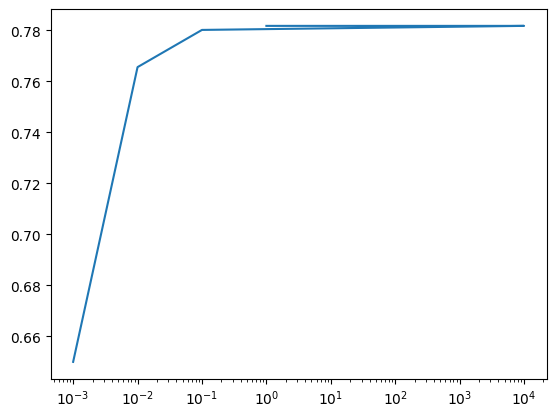

In [58]:
# İstersek bunu grafik ile de görselleştirebiiriz.
ax = plt.gca()

ax.plot(df['C (1 / lambda)'].values, df['Validation Accuracy'].values)

ax.set_xscale('log')

Şimdi ilgili C değeri için test skorumuza bakalım.

In [59]:
# Modelimizi kuruyoruz. C değeri için 1000 veriyoruz.
logreg = LogisticRegression(C = 1000, penalty = 'l2', max_iter = 10000)

# Önceden scale ettiğimiz train ve test ile fit ve score işlemlerini gerçekleştirelim.
logreg.fit(X_train_scaled, y_train)

score = logreg.score(X_test_scaled, y_test)

print(score)

0.7142857142857143


Şimdi aynı işlemi l1 ceza parametresi için uygulayalım. l1 uygulayabilmek için solver parametresini de liblinear yapmamız gerekiyor.

In [60]:
# C değerleri için bir liste oluşturalım.
c_range = [0.001,0.01,0.1,1,10,100,1000,10000]

# Cross Validation skorlarını tutmak için boş bir liste yaratalım.
cv_scores = []

# Şimdi bir döngü kurup her C değeri için CV skoru kaydedelim.
for c in c_range:
    logreg = LogisticRegression(C = c, penalty = 'l1', solver = 'liblinear', max_iter = 10000)

    scaler = StandardScaler()

    pipe = make_pipeline(scaler, logreg)

    cv_score = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42))

    cv_scores.append([c, np.mean(cv_score)])

In [61]:
# Şimdi sonuçlarımızı bir DataFrame ile gösterelim.
df = pd.DataFrame(cv_scores, columns = ['C (1 / lambda)', 'Validation Accuracy'])
df = df.sort_values(by = 'Validation Accuracy', ascending = False)

df

,C (1 / lambda),Validation Accuracy
2,0.100,0.786700
3,1.000,0.783369
4,10.000,0.781729
5,100.000,0.781729
6,1000.000,0.781729
7,10000.000,0.781729
1,0.010,0.703490
0,0.001,0.651507


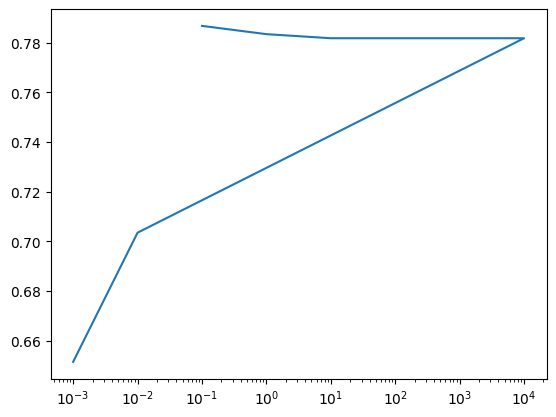

In [62]:
# İstersek bunu grafik ile de görselleştirebiiriz.
ax = plt.gca()

ax.plot(df['C (1 / lambda)'].values, df['Validation Accuracy'].values)

ax.set_xscale('log')

In [63]:
# Modelimizi kuruyoruz. C değeri için 1000 veriyoruz.
logreg = LogisticRegression(C = 0.100, penalty = 'l1', solver = 'liblinear', max_iter = 10000)

# Önceden scale ettiğimiz train ve test ile fit ve score işlemlerini gerçekleştirelim.
logreg.fit(X_train_scaled, y_train)

score = logreg.score(X_test_scaled, y_test)

print(score)

0.6948051948051948


## Decision Tree Classifier

Bu bölümde karar ağaçları kullanarak sınıflandırma yapacağız. Buradaki pratiklere geçmeden önce karar ağaçlarının teorisine göz atmanızı tavsiye ederim.

İlk olarak Diabetes Data veri setini yükleyelim.

In [64]:
df_ = pd.read_table('../../datasets/classification/diabetesdata.txt')

df = df_.copy()

In [65]:
# X ve y setlerini ayıralım. Regresyon'da yaptığımız gibi yine iki özellik değişkeni alacağız.
X = df[['Glucose', 'BMI']]

y = df['Diabetes']

In [66]:
# Train/test split ayrımını yapalım. Sınıflandırma yapacağımızi için stratify parametresi kullanıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Şimdi DecisionTreeClassifier nesnemizi oluşturalım ve oluşturduğumuz karar ağacını görselleştirelim.

In [67]:
# DecisionTreeClassifier nesnemizi oluşturuyoruz.
dtc = DecisionTreeClassifier(ccp_alpha = 0.005)

# Fitting.
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

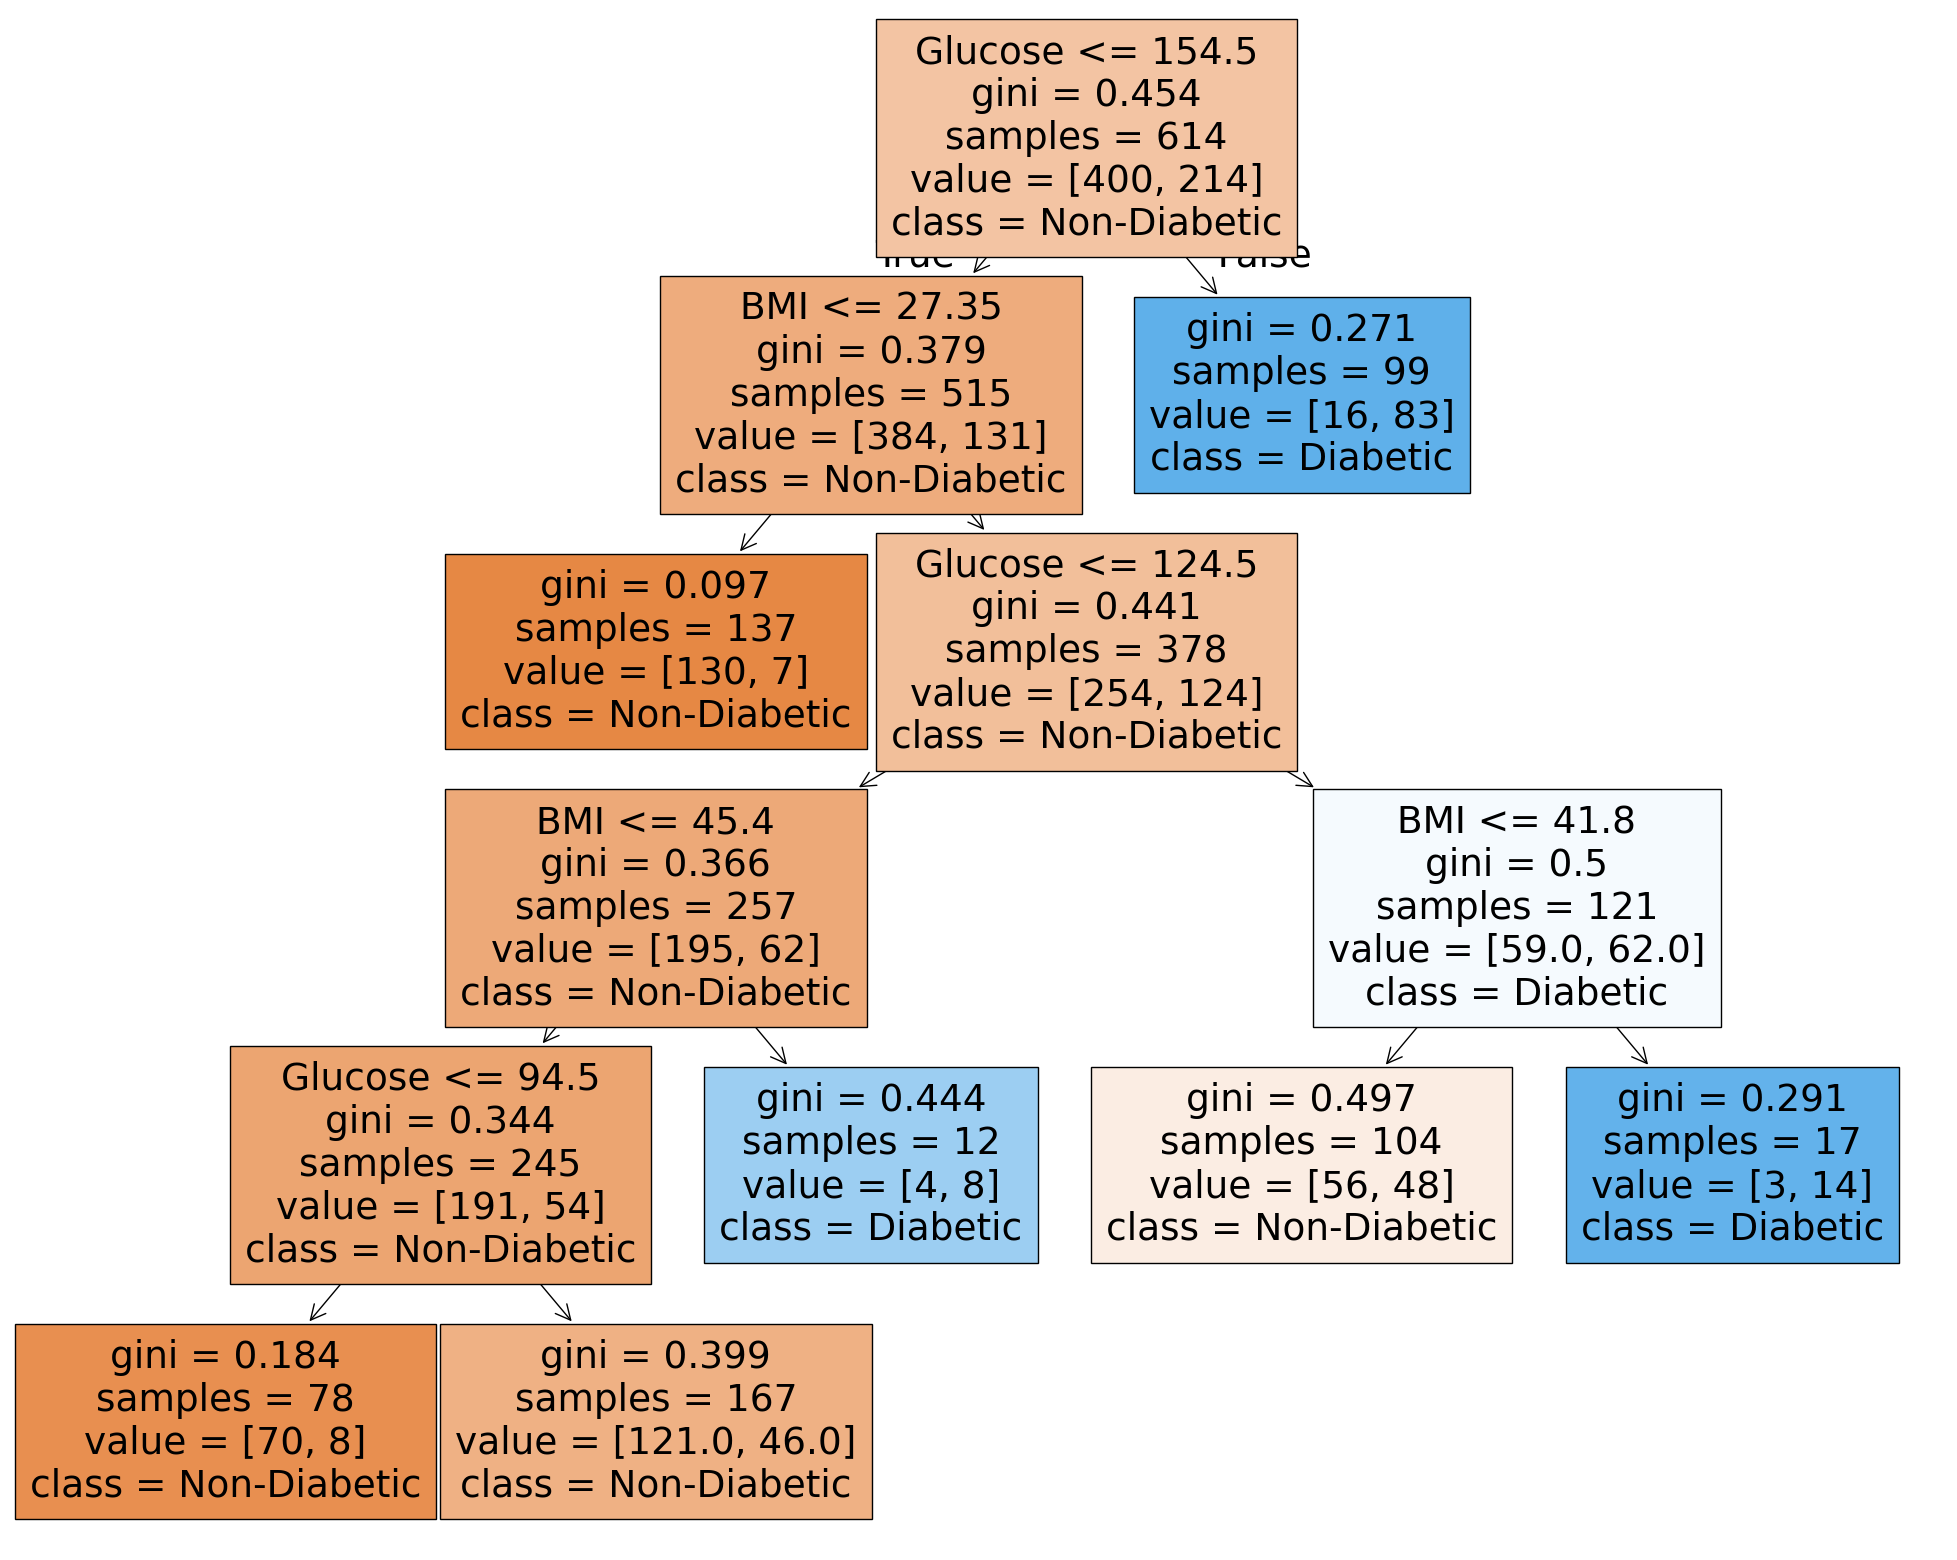

In [68]:
# Şimdi karar ağacımızı görelim.
plt.figure(figsize = (25, 20))

# İlgili node'un hangi sınıfa ait olduğunu belirtmek için class_names parametresi ile 0 ve 1 sınıf listemizi giriyoruz.
tree_plot = tree.plot_tree(dtc, class_names = ['Non-Diabetic', 'Diabetic'], feature_names = ['Glucose', 'BMI'], filled = True)

Şimdi complexity pruning path ile alpha değerlerini alıp en iyi ccp_alpha değerini bulmaya çalışalım.

In [69]:
alphas = dtc.cost_complexity_pruning_path(X_train, y_train)

# İlk 10 ccp_alpha gözlemi.
alphas['ccp_alphas'][:10]

array([0.        , 0.00054289, 0.00054289, 0.00054289, 0.00054289,
       0.00068905, 0.00081433, 0.00093067, 0.00096513, 0.00101339])

In [70]:
# Şimdi basit bir döngü kullanarak hem Cross Validation hem de Test için Accuracy skorunu maksimize etmeye çalışacağız.

# Skorları tutmak için boş bir liste oluşturuyorum.
scores = []

# Döngümüzü başlatalım.
for alpha in alphas.ccp_alphas:
    # DecisionTreeClassifier Instance
    dtc = DecisionTreeClassifier(ccp_alpha = alpha)

    # Cross Validation Scores
    cv_score = cross_val_score(dtc, X_train, y_train, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42))

    # Fitting
    dtc.fit(X_train, y_train)

    # Prediction
    y_pred = dtc.predict(X_test)

    # Test Accuracy
    test_accuracy = accuracy_score(y_pred, y_test)

    # Appending Scores
    scores.append([alpha, np.mean(cv_score), test_accuracy])

# Tüm skorları bir DataFrame içerisinde görüntüleyelim.
scores_df = pd.DataFrame(scores, columns = ['Alpha', 'CV Accuracy', 'Test Accuracy'])

In [71]:
scores_df.sort_values(by = 'Test Accuracy', ascending = False)

,Alpha,CV Accuracy,Test Accuracy
47,0.001819,0.726415,0.746753
42,0.001547,0.705103,0.746753
51,0.002316,0.747620,0.740260
56,0.002429,0.752644,0.740260
46,0.001750,0.726362,0.740260
...,...,...,...
5,0.000689,0.693813,0.694805
71,0.025122,0.732919,0.694805
21,0.001086,0.688948,0.694805
0,0.000000,0.690508,0.688312


In [72]:
# Şimdi bulduğumuz optimum ccp_alpha değeri ile fit işlemini gerçekleştirelim.
dtc = DecisionTreeClassifier(ccp_alpha = 0.001665)

# Fitting
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001665)

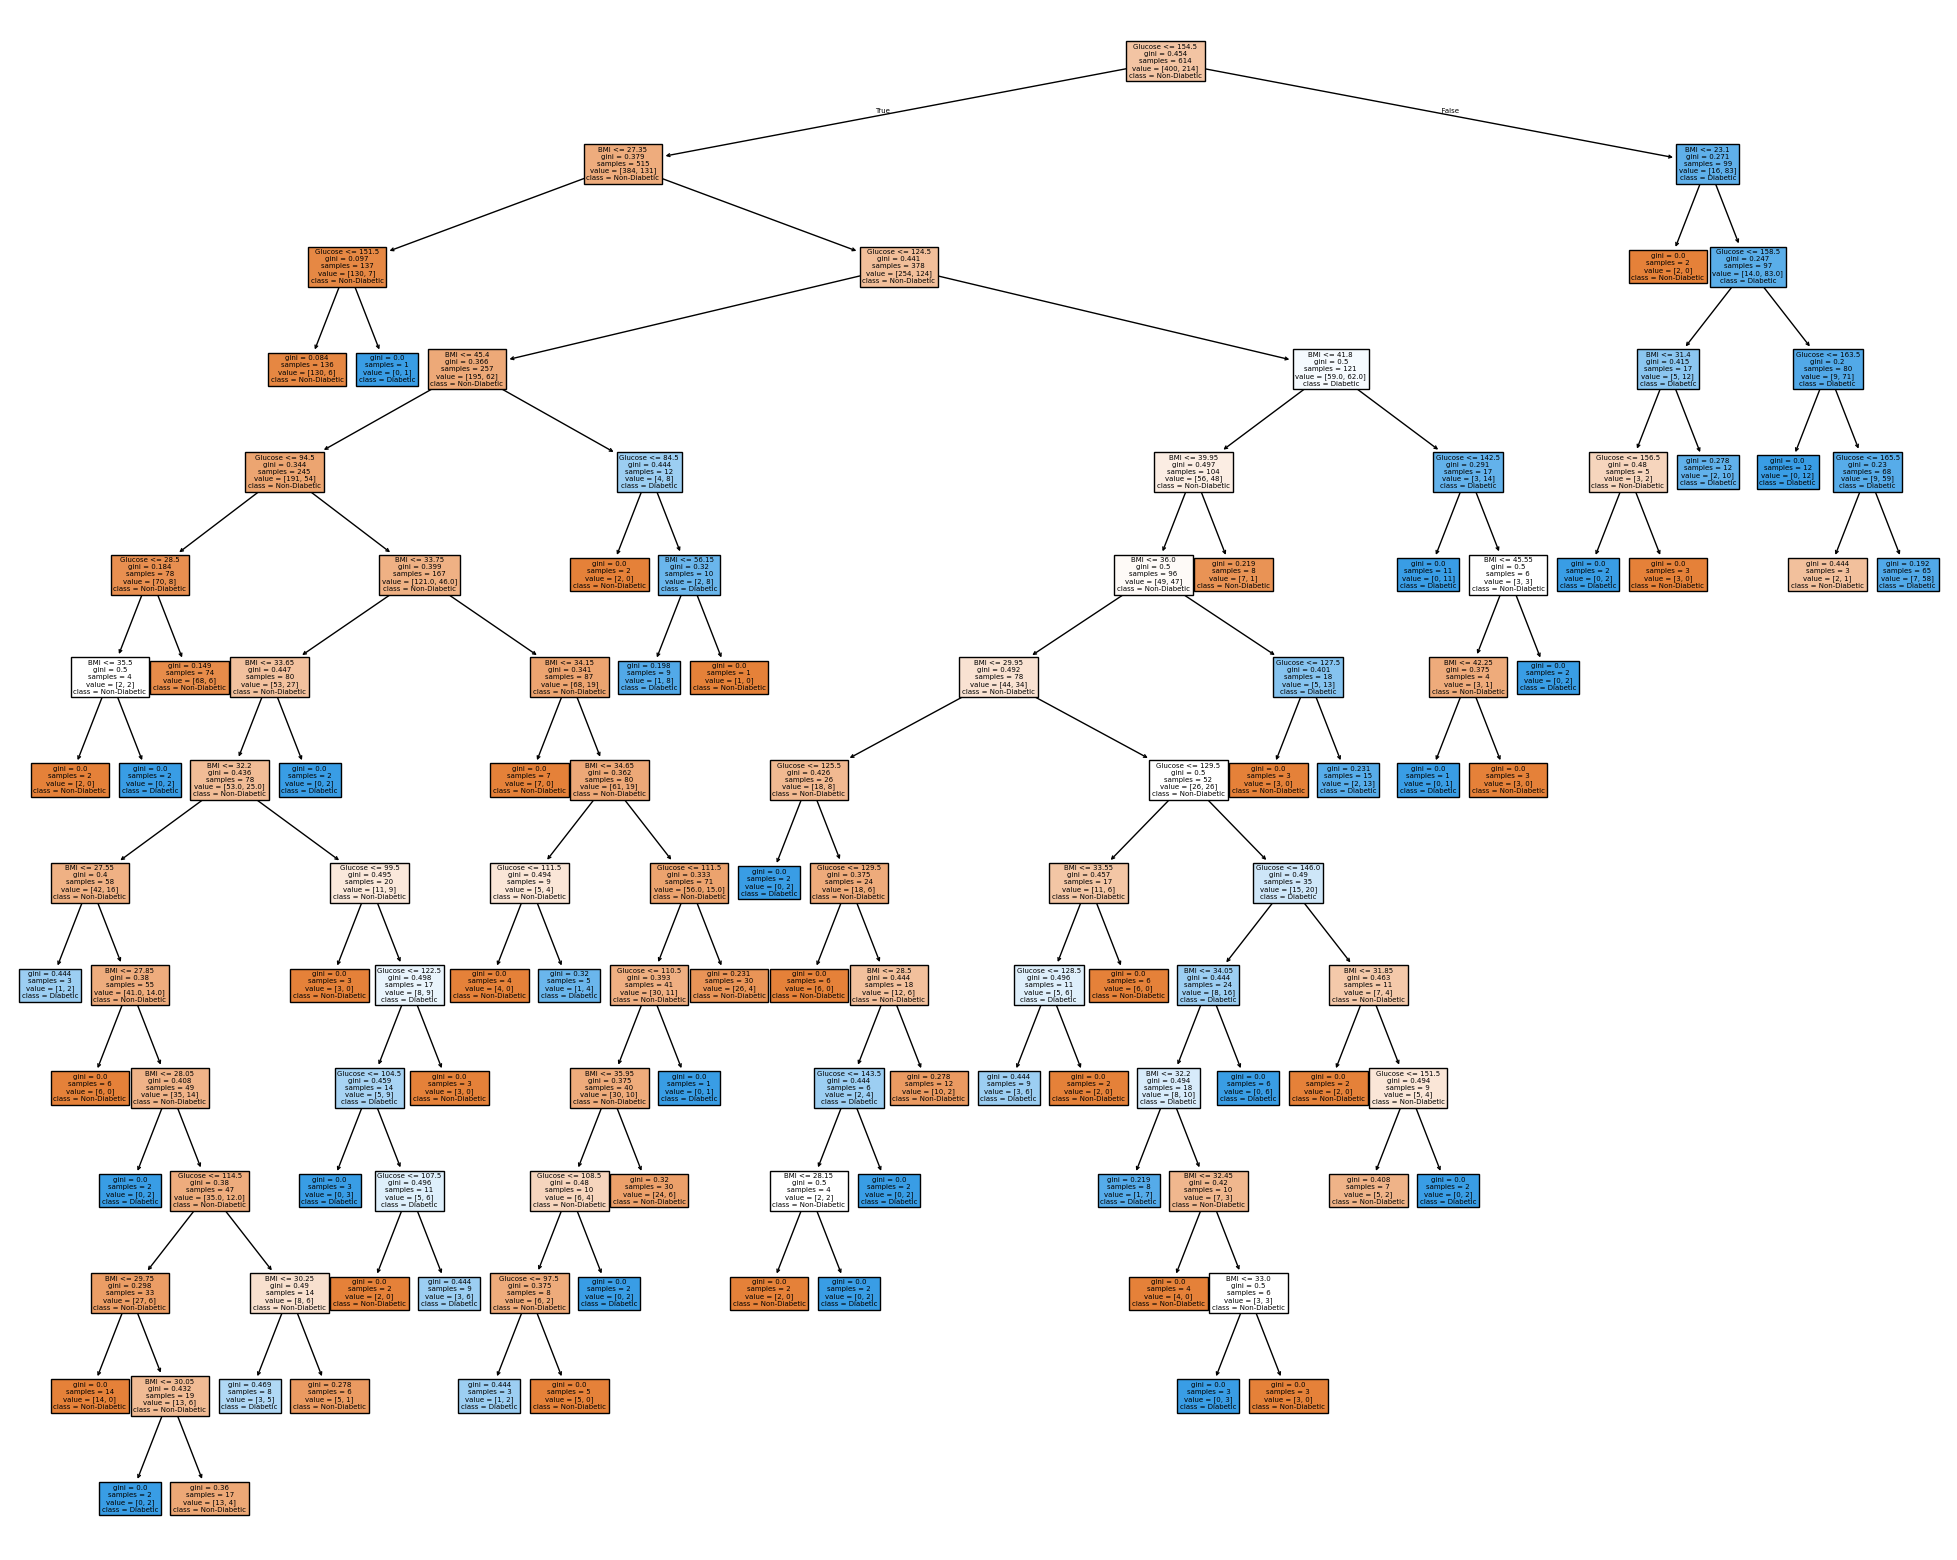

In [73]:
# Karar ağacını görüntüleyelim.
plt.figure(figsize = (25, 20))

tree_plot = tree.plot_tree(dtc, class_names = ['Non-Diabetic', 'Diabetic'], feature_names = ['Glucose', 'BMI'], filled = True)

In [74]:
# Tahmin ve Accuracy Score
y_pred = dtc.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7272727272727273


Şimdi aynı veri setinin csv versiyonunu tekrar okutup tüm veri seti için bir karar ağacı modeli optimize edelim. Bakalım değişken sayısı arttığında modelimiz nasıl çalışacak.

In [75]:
df_ = pd.read_csv('../../datasets/classification/diabetes.csv')

df = df_.copy()

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
# Train/test Split
X = df.drop(columns = ['Outcome'], axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [77]:
# DTC Instance
dtc = DecisionTreeClassifier()

# Path
alphas = dtc.cost_complexity_pruning_path(X_train, y_train)

# Skorları tutmak için boş bir liste oluşturuyorum.
scores = []

# Döngümüzü başlatalım.
for alpha in alphas.ccp_alphas:
    # DecisionTreeClassifier Instance
    dtc = DecisionTreeClassifier(ccp_alpha = alpha)

    # Cross Validation Scores
    cv_score = cross_val_score(dtc, X_train, y_train, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42))

    # Fitting
    dtc.fit(X_train, y_train)

    # Prediction
    y_pred = dtc.predict(X_test)

    # Test Accuracy
    test_accuracy = accuracy_score(y_pred, y_test)

    # Appending Scores
    scores.append([alpha, np.mean(cv_score), test_accuracy])

# Tüm skorları bir DataFrame içerisinde görüntüleyelim.
scores_df = pd.DataFrame(scores, columns = ['Alpha', 'CV Accuracy', 'Test Accuracy'])

In [78]:
scores_df.sort_values(by = 'Test Accuracy', ascending = False)[:5]

,Alpha,CV Accuracy,Test Accuracy
51,0.007361,0.737705,0.798701
50,0.005776,0.737731,0.798701
52,0.007584,0.737705,0.798701
49,0.005037,0.737626,0.792208
33,0.002986,0.704997,0.759740


In [79]:
# Şimdi bulduğumuz optimum ccp_alpha değeri ile fit işlemini gerçekleştirelim.
dtc = DecisionTreeClassifier(ccp_alpha = 0.005776)

# Fitting
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005776)

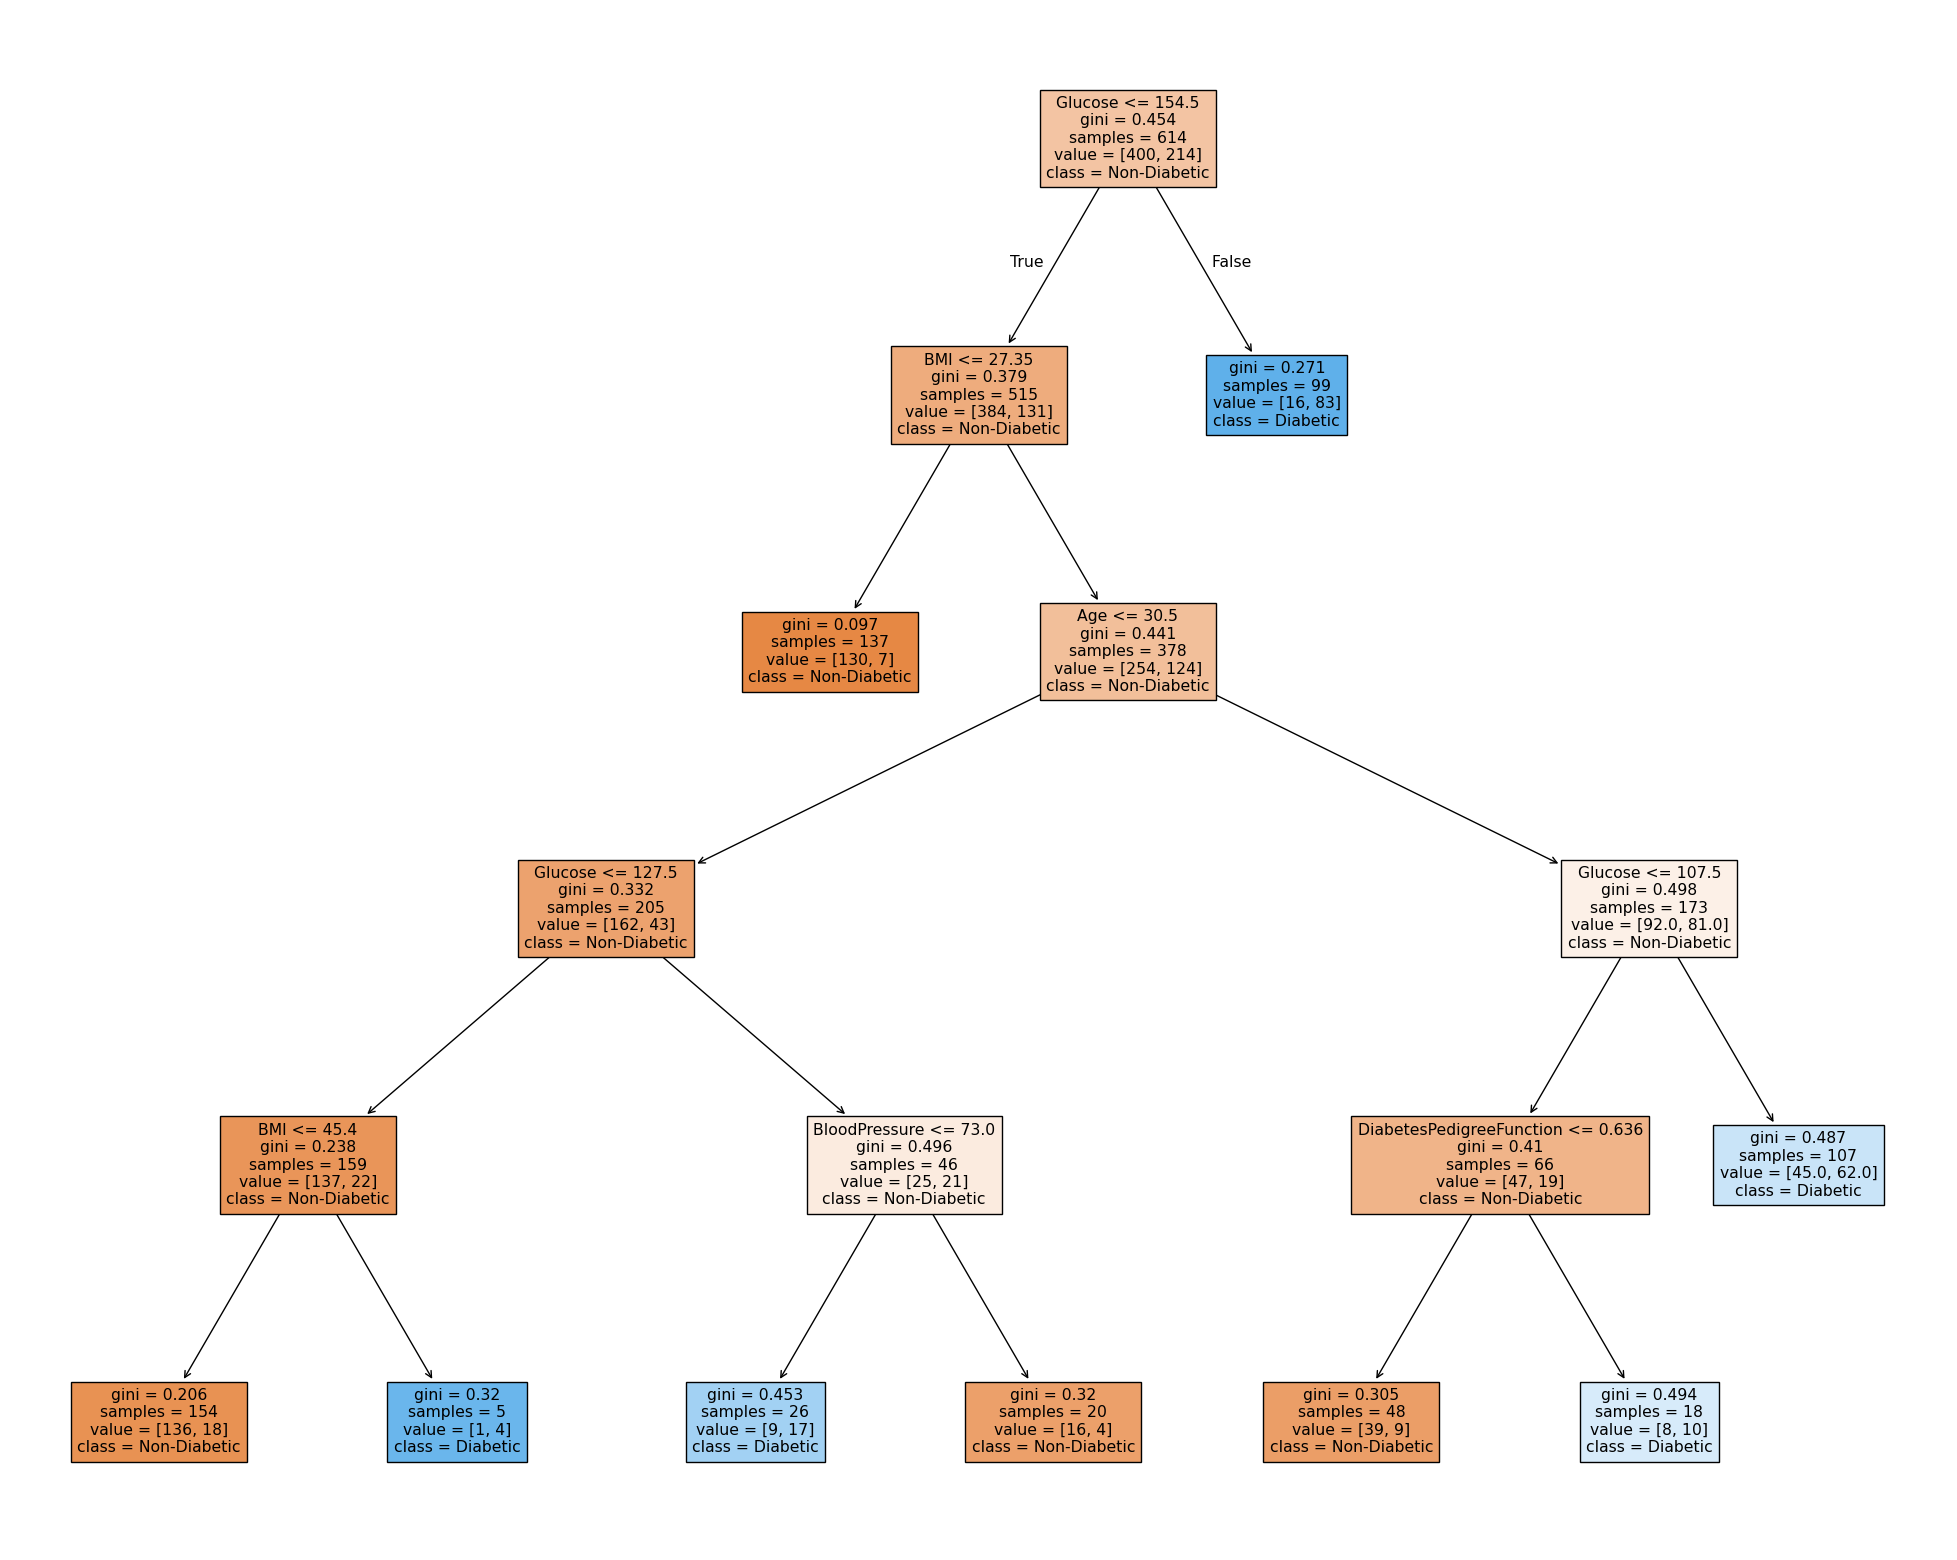

In [80]:
# Karar ağacını görüntüleyelim.
plt.figure(figsize = (25, 20))

tree_plot = tree.plot_tree(dtc, class_names = ['Non-Diabetic', 'Diabetic'], feature_names = X.columns, filled = True)

In [81]:
# Tahmin ve Accuracy Score
y_pred = dtc.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7922077922077922


## Bagging & Random Forests

Standart karar ağaçları, yüksek varyans içermektedir. Train ve test split'i her yaptığımızda, alınan farklı train ve test setler ile kurulacak karar ağaçlarının performansları birbirinden çok farklı olacaktır. Bu nedenle bu karar ağaçlarının ortalama performansını alsak bile bu varyans final modelimizin her bölünmede farklı performans göstermesine yol açabilir.

Bu durumu aşmak için farklı teknikler geliştirilmiştir, Bagging de bunlardan bir tanesidir.

Bagging tekniği basitçe, elimizdeki veri setinden B adet örnek veri seti üretmemizi sağlar (buna bootstrap denir). Örneğin elimizdeki veri setinin 100 adet gözlem sayısı olsun (100 satırı var yani). Bu veri setinden üreteceğimiz her örnek veri setinin de 100 adet gözlemi olacak. Her bir örnek veri setinin içerisindeki gözlemler, orijinal veri setindeki gözlemlerinm rasgele seçilmesiyle oluşur (yani herhangi bir örnek veri setindeki gözlemler tekrarlı olabilir zira rasgele seçilerek oluşturuldu, olasılık problemlerinde torbadan bilye çekerken her defasında çekilen bilyeyi geri atmamız gibi).

Regresyon problemleri için üretilen B adet veri setine de karar ağacı uygulanır ve skorların ortalaması alınır. Sınıflandırma problemleri için ise oluşturulan B adet gözlemdeki en yüksek gözlenen sınıf sayısı alınır.

Baggin için Cross-Validation skor yerine Out of Bag Error denilen bir hata tipi kullanmaktayız. Bu hata tipi basitçe şu şekildedir: B adet örnek veri seti ürettiğimizi ve her birisinin ana setindeki gözlemlerin rasgele çekilmesiyle oluşturulduğunu söylemiştik. Bu B adet örnek veri setinin her birisinde, ana veri setinde bulunan ama ilgili örnek veri setinde kullanılmayan (rasgele seçimden dolayı seçilmemiş olan) gözlemler üzerinden hata skoru üretilir (bir ek bilgi olaral şunu söyleyelim, bu skorlama genel olarak Leave-One-Out Cross Validation skoruna denk geliyormuş). Detayı için teorik bir araştırma yapabilirsiniz, şu anda yeterince detaylı anlattım.

Bu tekniğin devamında ortaya çıkmış olan daha etkili bir teknik ise Random Forests'tır. Bagging ile bootstrap yaparken, ana veri setinin gözlem sayısı kadar gözleme sahip olan örnek veri setleri ürettiğimizi söylemiştik. Bunu yaparken ana veri setindeki tüm tahminciler (yani özellikler) kullanılır. Random Forest ise ağacı dallandırdığı her ayrımda, P adet özellik arasından rasgele m adedini alarak ayrım yapar. Bunun arkasında yatan mantık, değişkenlerin önemiyle açıklanabilir. Veri setinde her değişkenin modele katkısının aynı olmadığını Feature Selection notebook'unda açıklamıştık. Buradaki mantık da, ayrım yapılırken kullanılan değişkenleri değiştirerek hangi değişkenin daha etkili olduğunu bulmaya çalışmaktır. Model bunu kendi içerisinde yapar. Eğer her değişkeni sürekli kullanırsak, güçlü olan değişkenler ilgili örnek veri seti için performansı yukarı çıkaracaktır. Ancak bazı değişkenleri çıkartarak ayrım yaparsak performans bazılarında düşük, bazılarında yüksek olacaktır. Bu yöntem bu sebeple oldukça etkili sonuçlar vermektedir.

Şimdi uygulama kısmına geçelim. Bu kısımda aynı zamanda GridSearchCV ile hyperparameter tuning yapmayı da göreceğiz.

In [82]:
# Yine Diabetes veri setiyle çalışacağız.
df = pd.read_table('../../datasets/classification/diabetesdata.txt')

df.head()

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
# Train/test split.
X = df.drop(columns = ['Diabetes'], axis = 1)

y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [84]:
# DecisionTreeClassifier ve Bagging Classifier nesnemizi oluşturalım. Bagging'i, karar ağacı modelimizi içerisine yerleştirerek kullanıyoruz.
dtc = DecisionTreeClassifier()

# 100 adet ağaç fit ederek bagging yapalım. oob_score (Out of Bag Score) parametresini de true veriyoruz.
bag = BaggingClassifier(dtc, n_estimators = 100, random_state = 42, oob_score = True)

# Fitting
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=42)

In [85]:
# Skorumuza bakalım.
y_pred = bag.predict(X_test)

print('OOB Accuracy Score:', bag.oob_score_) # Bagging için Cross Validation kullanmıyoruz, hatırlatırım.
print('Test Accuracy:', accuracy_score(y_test, y_pred))

OOB Accuracy Score: 0.747557003257329
Test Accuracy: 0.7467532467532467


Değerlerin ne kadar yakın olduğuna dikkat edin.

In [86]:
# Şimdi bir de LogisticRegression ile bagging deneyelim.
logreg = LogisticRegression(max_iter = 10000)

bag = BaggingClassifier(logreg, n_estimators = 100, random_state = 42, oob_score = True)

bag.fit(X_train, y_train)

# Skorumuza bakalım.
y_pred = bag.predict(X_test)

print('OOB Accuracy Score:', bag.oob_score_)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

OOB Accuracy Score: 0.7850162866449512
Test Accuracy: 0.7142857142857143


Buradaki değerlerin açıklığına bakın.

Buradan şu sonucu çıkarabiliriz, karar ağacı ile bagging'i bir arada kullanmak, OOB ve Test Accuracy arasındaki farkı azaltıyor. Bu durumda overfitting riskini azalttığımızı söyleyebiliriz.

Şimdi bir de Random Forest ile deneme yapalım.

In [87]:
# Random Forest Classifier instance.
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42, oob_score = True)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('OOB Accuracy Score:', rfc.oob_score_)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

OOB Accuracy Score: 0.754071661237785
Test Accuracy: 0.7597402597402597


Görebileceğimiz üzere Random Forest Classifier biraz daha iyi bir sonuç gösterdi.

In [88]:
# Şimdi RFC için ağaç sayısını optimize etmeye çalışalım.

# OOB skorları tutmak için bir liste oluşturalım.
oob_scores = []

# Ağaç uzayını oluşturalım. linspace float değerler üretir, bunu int'e çevireceğiz.
tree_space = np.linspace(start = 50, stop = 500, num = 10)

# Döngümüzü kuralım.
for tree in tree_space:
    #RFC instance.
    rfc = RandomForestClassifier(n_estimators = int(tree), random_state = 42, oob_score = True)

    # RFC Fit.
    rfc.fit(X_train, y_train)

    # OOB Score
    oob_score = rfc.oob_score_

    # Ağacı ve skoru listeye ekleyelim.
    oob_scores.append([tree, oob_score])

oob_scores_df = pd.DataFrame(oob_scores, columns = ['Number of Trees', 'OOB Accuracy'])

In [89]:
oob_scores_df.sort_values(by = 'OOB Accuracy', ascending = False)

,Number of Trees,OOB Accuracy
2,150.0,0.758958
8,450.0,0.758958
7,400.0,0.757329
9,500.0,0.755700
0,50.0,0.754072
1,100.0,0.754072
3,200.0,0.752443
4,250.0,0.752443
5,300.0,0.750814
6,350.0,0.750814


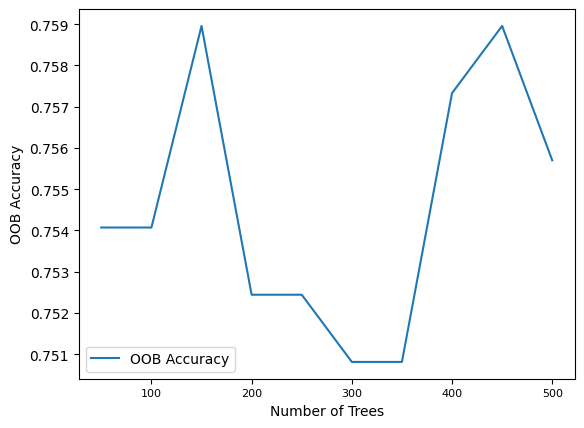

In [90]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.plot(oob_scores_df['Number of Trees'].values, oob_scores_df['OOB Accuracy'].values, label = 'OOB Accuracy')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('OOB Accuracy')
ax.tick_params(axis = 'x', labelsize = 8)
ax.legend(loc = 'best')

plt.show()

In [91]:
# Şimdi en iyi ağaç değeriyle test performansına bakalım.
rfc = RandomForestClassifier(n_estimators = 150, random_state = 42, oob_score = True)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7597402597402597


Random Forest'ın default max_feature değeri, toplam feature sayısının kareköküdür (sqrt(p)). Yani aslında tüm özellikler ile ağaç kurmuyorduk.

Şimdi kendimiz sırasıyla 1'den n'e kadar özellikleri deneyerek optimum ağaç sayısı üzerinden model kuralım.

In [92]:
# Şimdi RFC için ağaç sayısını optimize etmeye çalışalım.

# OOB skorları tutmak için bir liste oluşturalım.
oob_scores = []

# Feature sayısı için uzayı oluşturalım.
num_features = range(1, 9)

# Döngümüzü kuralım.
for feature in num_features:
    #RFC instance.
    rfc = RandomForestClassifier(n_estimators = 150, max_features = feature, random_state = 42, oob_score = True)

    # RFC Fit.
    rfc.fit(X_train, y_train)

    # OOB Score
    oob_score = rfc.oob_score_

    # Ağacı ve skoru listeye ekleyelim.
    oob_scores.append([feature, oob_score])

oob_scores_df = pd.DataFrame(oob_scores, columns = ['Number of Features', 'OOB Accuracy'])

oob_scores_df.sort_values(by = 'OOB Accuracy', ascending = False)

,Number of Features,OOB Accuracy
0,1,0.773616
2,3,0.767101
4,5,0.765472
3,4,0.763844
5,6,0.763844
1,2,0.758958
7,8,0.757329
6,7,0.755700


Tek bir özellik kullandığında skorun nasıl arttığına bakın :)

In [93]:
# Şimdi en iyi max_feature değeriyle test performansına bakalım.
rfc = RandomForestClassifier(n_estimators = 150, max_features = 1, random_state = 42, oob_score = True)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7467532467532467


In [94]:
# Bir de max_feature = 3 değeriyle test performansına bakalım.
rfc = RandomForestClassifier(n_estimators = 150, max_features = 3, random_state = 42, oob_score = True)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.7597402597402597


Gördüğümüz gibi, OOB skoru en yüksek olmamasına rağmen max_feature = 3 test setinde daha iyi performans verdi. Bunun üzerine biraz düşünmenizi tavsiye ederim.

Şimdi artık GridSearchCV kullanarak parametre optimizasyonu yapabiliriz. GridSearchCV, farklı modelleri ve her modele ilişkin farklı parametre havuzlarını denememizi sağlayan bir araçtır. Her parametre kombinasyonunu tek tek deneyerek en iyi sonucu bulmaya çalışır. Her deneme için ilgili parametreler ile tekrar model kurduğu için çalışması uzun sürebilir.

Şimdi sadece Random Forest Classifier modeli için n_estimators ve max_features parametrelerindeki optimal değeri bulmaya çalışalım.

In [108]:
# Random Forest Classifier instance.
rfc = RandomForestClassifier(random_state = 42)

# n_estimators space.
n_estimators = [100,200,300,400,500,600]

# max_features space.
max_features = [1,2,3,4,5,6,7,8]

# Search space oluşturalım.
params = {
    'n_estimators' : n_estimators,
    'max_features' : max_features
}

params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8]}

In [112]:
# GridSearchCV instance.
rfc_grid = GridSearchCV(estimator = rfc,
                        param_grid = params,
                        cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
                        verbose = 2,
                        scoring = 'accuracy',
                        n_jobs = -1)

# GridSearchCV fitting.
rfc_grid.fit(X_train, y_train)

# Şimdi en iyi parametre değerlerini görüntüleyelim.
print(rfc_grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 1, 'n_estimators': 100}


In [113]:
# En iyi parametrelerle test skoruna bakalım.
rfc = RandomForestClassifier(max_features = 1, n_estimators = 100, random_state = 42, oob_score = True)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.7402597402597403


In [114]:
# Şimdi de Accuracy yerine ROC-AUC üzerinden skorlama yaparak sonuç bulalım.
rfc_grid = GridSearchCV(estimator = rfc,
                        param_grid = params,
                        cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
                        verbose = 2,
                        scoring = 'roc_auc',
                        n_jobs = -1)

# GridSearchCV fitting.
rfc_grid.fit(X_train, y_train)

# Şimdi en iyi parametre değerlerini görüntüleyelim.
print(rfc_grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_features': 3, 'n_estimators': 300}


Test Accuracy: 0.7597402597402597


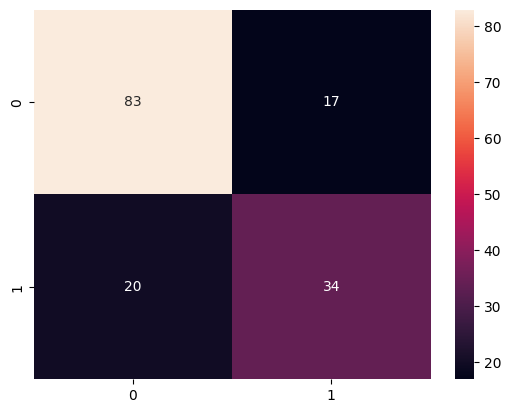

In [119]:
# En iyi parametrelerle test skoruna bakalım.
rfc = RandomForestClassifier(max_features = 3, n_estimators = 300, random_state = 42, oob_score = True)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Proba değerlerini de alıyoruz.
y_pred_proba = np.array(rfc.predict_proba(X_test))

# Confusion Matrix görselleştirelim.
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

print('Test Accuracy:', accuracy_score(y_test, y_pred))

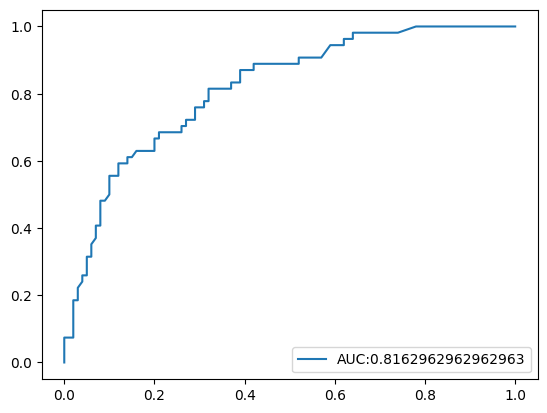

In [118]:
# Şimdi de ROC curve çizdirelim.
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr, label = 'AUC:' + str(auc))
plt.legend(loc = 4)

plt.show()

Şimdi her bir değişkenin importance, yani önem değerine bakalım ve görselleştirelim.

In [120]:
# Importance değerlerini basitçe bu şekilde alabiliriz.
rfc.feature_importances_

array([0.07861273, 0.2897338 , 0.08420074, 0.06247284, 0.06564191,
       0.16438872, 0.12676063, 0.12818863])

In [121]:
?rfc.feature_importances_

Type:        property
String form: <property object at 0x0000017438AABFB0>
Docstring:  
The impurity-based feature importances.

The higher, the more important the feature.
The importance of a feature is computed as the (normalized)
total reduction of the criterion brought by that feature.  It is also
known as the Gini importance.

high cardinality features (many unique values). See
:func:`sklearn.inspection.permutation_importance` as an alternative.

Returns
-------
feature_importances_ : ndarray of shape (n_features,)
    The values of this array sum to 1, unless all trees are single node
    trees consisting of only the root node, in which case it will be an
    array of zeros.

<Axes: >

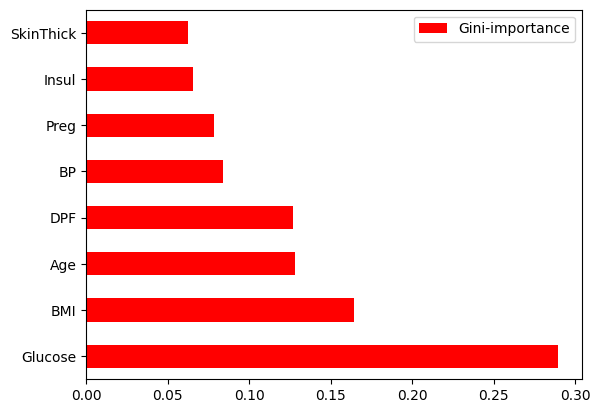

In [132]:
# Şimdi importance değerlerini çizdirelim.
features = {} # Feature isimlerini tutması için boş bir sözlük oluşturalım.
importances = rfc.feature_importances_

# features sözlüğü içerisine kolon ismi ve önem düzeyini eşleyerek ekliyoruz.
for feature, importance in zip(X.columns, rfc.feature_importances_):
    features[feature] = importance # Feature ismiyle importance değerini key-value şeklinde eşliyoruz.

# importances adında bir DataFrame oluşturalım.
importances = pd.DataFrame.from_dict(features, orient = 'index').rename(columns = {0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)

importances.plot.barh(color='r')

In [133]:
features

{'Preg': 0.0786127262161168,
 'Glucose': 0.2897337984320245,
 'BP': 0.0842007444958182,
 'SkinThick': 0.062472838358163627,
 'Insul': 0.06564191388518631,
 'BMI': 0.16438871597646834,
 'DPF': 0.12676062889594122,
 'Age': 0.12818863374028097}

In [134]:
importances

,Gini-importance
Glucose,0.289734
BMI,0.164389
Age,0.128189
DPF,0.126761
BP,0.084201
Preg,0.078613
Insul,0.065642
SkinThick,0.062473
